In [1]:
import pandas as pd
import matplotlib.pyplot as plt
print('Libraries Imported')

Libraries Imported


In [2]:
!git clone 'https://github.com/Ganesh9100/Credit-Card-Balance.git'

Cloning into 'Credit-Card-Balance'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [3]:
%cd /content/Credit-Card-Balance

/content/Credit-Card-Balance


In [5]:
data = pd.read_csv('balance.txt', sep=",",index_col=[0])  # index_cols = making the unnamed col as index
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
data.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [7]:
data.shape

(400, 11)

In [8]:
data['Balance'].describe()

count     400.000000
mean      520.015000
std       459.758877
min         0.000000
25%        68.750000
50%       459.500000
75%       863.000000
max      1999.000000
Name: Balance, dtype: float64

In [10]:
data['Balance'].isnull().sum()  # no null values in Balance ( Target Column)

0

In [11]:
data.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [12]:
data.isnull().sum() # There is no null values

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [16]:
# We have  Gender , Student , Married , Ethnicity as Categorical Variable 
# All come under Nominal Categories so we can use Label Encoding 
data['Student'].value_counts()


No     360
Yes     40
Name: Student, dtype: int64

In [17]:
data['Married'].value_counts()

Yes    245
No     155
Name: Married, dtype: int64

In [18]:
data['Gender'].value_counts()

Female    207
 Male     193
Name: Gender, dtype: int64

In [19]:
data['Ethnicity'].value_counts() 

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [20]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Student']= label_encoder.fit_transform(data['Student'])
data['Married']= label_encoder.fit_transform(data['Married'])


array([0, 1])

In [26]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,0,0,1,Caucasian,333
2,106.025,6645,483,3,82,15,1,1,1,Asian,903
3,104.593,7075,514,4,71,11,0,0,0,Asian,580
4,148.924,9504,681,3,36,11,1,0,0,Asian,964
5,55.882,4897,357,2,68,16,0,0,1,Caucasian,331


**Checking the mean of Ethnicity Column with different categories**

In [30]:
data[data['Ethnicity'] == 'Caucasian'][['Balance']].mean()

Balance    518.497487
dtype: float64

In [31]:
data[data['Ethnicity'] == 'Asian'][['Balance']].mean()

Balance    512.313725
dtype: float64

In [34]:

data[data['Ethnicity'] == 'African American'][['Balance']].mean()

Balance    531.0
dtype: float64

In [35]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,0,0,1,Caucasian,333
2,106.025,6645,483,3,82,15,1,1,1,Asian,903
3,104.593,7075,514,4,71,11,0,0,0,Asian,580
4,148.924,9504,681,3,36,11,1,0,0,Asian,964
5,55.882,4897,357,2,68,16,0,0,1,Caucasian,331


In [39]:
data.groupby('Ethnicity').Balance.agg(['count','min','max','mean'])

,count,min,max,mean
Ethnicity,,,,
African American,99,0,1809,531.000000
Asian,102,0,1779,512.313725
Caucasian,199,0,1999,518.497487


In [51]:
df_processed = pd.get_dummies(data, prefix_sep="_",
                              columns=['Ethnicity'])

In [53]:
df_processed.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,0,0,1,333,0,0,1
2,106.025,6645,483,3,82,15,1,1,1,903,0,1,0
3,104.593,7075,514,4,71,11,0,0,0,580,0,1,0
4,148.924,9504,681,3,36,11,1,0,0,964,0,1,0
5,55.882,4897,357,2,68,16,0,0,1,331,0,0,1


In [63]:
x = df_processed.drop('Balance',axis=1)
y = data['Balance']


In [64]:
y.head()

1    333
2    903
3    580
4    964
5    331
Name: Balance, dtype: int64

In [65]:
x.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,0,0,1,0,0,1
2,106.025,6645,483,3,82,15,1,1,1,0,1,0
3,104.593,7075,514,4,71,11,0,0,0,0,1,0
4,148.924,9504,681,3,36,11,1,0,0,0,1,0
5,55.882,4897,357,2,68,16,0,0,1,0,0,1


In [66]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(320, 12) (80, 12) (320,) (80,)


**Linear Regression**

Text(0, 0.5, 'Predicted Y')

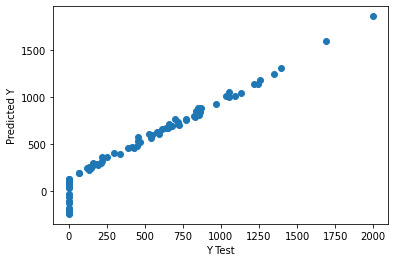

In [67]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

predictions = LR.predict(X_test)


plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')





In [68]:

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 79.3600313200823
MSE: 9368.839406319037
RMSE: 96.79276525814849


**Decision Tree Regressor**

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import r2_score,mean_squared_error

In [75]:
DecisionTreeRegModel = DecisionTreeRegressor()
DecisionTreeRegModel.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [76]:
y_pred = DecisionTreeRegModel.predict(X_test)

In [80]:
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print('R2:', r2)
print('MSE:', mse)
print('RMSE:', rmse)

R2: 0.7757649579789901
MSE: 46180.225
RMSE: 214.89584686540593


**H2O**

In [82]:
!pip install h2o # https://pypi.org/project/h2o/

     |████████████████████████████████| 164.8MB 78kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.3-py2.py3-none-any.whl size=164854343 sha256=3449be1a3bed8f37419a0204df5d219bbf30246d2d6f8661ad86b031c549fc71
  Stored in directory: /root/.cache/pip/wheels/4f/bb/82/0988682f9abd0b5e95109a4aae6793dd427173b6dc671d9252
Successfully built h2o


In [83]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7kllqiiz
  JVM stdout: /tmp/tmp7kllqiiz/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7kllqiiz/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,1 month and 1 day
H2O_cluster_name:,H2O_from_python_unknownUser_39d4q2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.174 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [86]:
df = pd.read_csv('balance.txt', sep=",",index_col=[0])
df.to_csv('Balance.csv')
df = h2o.import_file('/content/Credit-Card-Balance/Balance.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [87]:
df.describe()

Rows:400
Cols:12




,C1,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
type,int,real,int,int,int,int,int,enum,enum,enum,enum,int
mins,1.0,10.354,855.0,93.0,1.0,23.0,5.0,,,,,0.0
mean,200.5,45.21888499999999,4735.599999999997,354.94,2.957500000000001,55.66750000000002,13.449999999999998,,,,,520.0150000000002
maxs,400.0,186.634,13913.0,982.0,9.0,98.0,20.0,,,,,1999.0
sigma,115.61430130683084,35.244273165070524,2308.1988475431444,154.72414259174894,1.3712748582403547,17.24980676220268,3.1252067600773348,,,,,459.75887738938314
zeros,0,0,0,0,0,0,0,,,,,90
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,14.890999999999998,3606.0,283.0,2.0,34.0,11.0,Male,No,Yes,Caucasian,333.0
1,2.0,106.025,6645.0,483.0,3.0,82.0,15.0,Female,Yes,Yes,Asian,903.0
2,3.0,104.593,7075.0,514.0,4.0,71.0,11.0,Male,No,No,Asian,580.0


In [88]:
y = 'Balance'

In [89]:
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

In [90]:
train.shape

(321, 12)

In [91]:
test.shape

(79, 12)

In [93]:
aml = H2OAutoML(max_runtime_secs = 120, seed = 1, project_name = "Credit_Card_Balance__H2o")
aml.train(y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [97]:
type(aml.leaderboard.head())

h2o.frame.H2OFrame

In [98]:
aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20210621_080039,4933.99,70.2424,4933.99,55.0679,nan
GBM_grid__1_AutoML_20210621_080039_model_8,6690,81.7924,6690,55.6827,nan
XGBoost_grid__1_AutoML_20210621_080039_model_10,7036.74,83.8853,7036.74,55.2455,nan
XGBoost_grid__1_AutoML_20210621_080039_model_5,7306.47,85.4779,7306.47,60.0608,nan
StackedEnsemble_AllModels_AutoML_20210621_080039,8153.43,90.2963,8153.43,66.4254,nan
XGBoost_grid__1_AutoML_20210621_080039_model_23,8195.17,90.5272,8195.17,59.8424,nan
XGBoost_grid__1_AutoML_20210621_080039_model_21,8674.74,93.1383,8674.74,56.2049,nan
GBM_grid__1_AutoML_20210621_080039_model_14,9066.51,95.2182,9066.51,64.5147,nan
XGBoost_grid__1_AutoML_20210621_080039_model_6,9315.94,96.5191,9315.94,70.3806,nan
DeepLearning_grid__1_AutoML_20210621_080039_model_3,9544.83,97.6977,9544.83,83.7374,nan


In [99]:
perf = aml.leader.model_performance(test)
perf


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 4933.992811996802
RMSE: 70.24238614965185
MAE: 55.067852338217264
RMSLE: NaN
R^2: 0.9772972043038628
Mean Residual Deviance: 4933.992811996802
Null degrees of freedom: 78
Residual degrees of freedom: 74
Null deviance: 17485455.910385177
Residual deviance: 389785.4321477473
AIC: 908.0006916266757


In [100]:
aml_full= H2OAutoML(max_runtime_secs = 600, seed = 1, project_name = "Credit_Card_Balance__H2o")
aml_full.train(y = y, training_frame = train)

AutoML progress: |
08:05:33.449: New models will be added to existing leaderboard Credit_Card_Balance__H2o@@Balance (leaderboard frame=py_3_sid_a90b) with already 70 models.

█████████████████████████████████████████████████████
08:13:57.758: StackedEnsemble_BestOfFamily_AutoML_20210621_080533 [StackedEnsemble best (built using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.

███| 100%

08:13:58.768: StackedEnsemble_AllModels_AutoML_20210621_080533 [StackedEnsemble all (built using all AutoML models)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.



In [102]:
aml_full.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20210621_080039,4933.99,70.2424,4933.99,55.0679,nan
GBM_grid__1_AutoML_20210621_080533_model_165,5421.54,73.6311,5421.54,49.1649,nan
GBM_grid__1_AutoML_20210621_080533_model_81,5657.15,75.214,5657.15,54.0959,nan
GBM_grid__1_AutoML_20210621_080533_model_59,5983.13,77.3507,5983.13,51.9403,nan
GBM_grid__1_AutoML_20210621_080533_model_39,6008.16,77.5123,6008.16,47.5765,1.17665
GBM_grid__1_AutoML_20210621_080533_model_186,6116.06,78.2052,6116.06,51.8476,nan
GBM_grid__1_AutoML_20210621_080533_model_104,6233.11,78.95,6233.11,48.0561,nan
XGBoost_grid__1_AutoML_20210621_080533_model_96,6307.28,79.4184,6307.28,54.3945,nan
XGBoost_grid__1_AutoML_20210621_080533_model_81,6391.86,79.9491,6391.86,49.4998,nan
GBM_grid__1_AutoML_20210621_080533_model_40,6644.11,81.5114,6644.11,51.198,nan
